<a href="https://colab.research.google.com/github/JMML2021/0501_sampling/blob/main/05_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd

# Descripció
Aprèn a realitzar mostreig de les dades amb Python.

In [184]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/01_COLAB/kaggle.json'

In [186]:
# Abro el fichero una vez adecuado

path = ('/content/drive/MyDrive/01_COLAB/resultsFutbol.csv')
df=  pd.read_csv(path)
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')

Hay  41243 filas con 9 columnas


In [187]:
df1 = df.copy()

# Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [188]:
# Muestreo aleatorio
# Escojo una muestar de 1.000 elementos.

muestra_df1 = df1.sample(1000)


ganado= muestra_df1[(muestra_df1['home_score'] > muestra_df1['away_score'])].count()
jugado= muestra_df1.shape[0]
porcentaje= ganado/jugado*100
print(round(porcentaje,2), '%')


date          50.4
home_team     50.4
away_team     50.4
home_score    50.4
away_score    50.4
tournament    50.4
city          50.4
country       50.4
neutral       50.4
dtype: float64 %


In [189]:
# Muestreo sistematico
# Creo una función que cada 5 elementos escojo un registro
import numpy as np


# Creo la funcion de muestreo sistematico
def muestreoSistematico(df, step):
 
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample


muestreoSistematico_df1 = muestreoSistematico(df1, 5)
ganado= muestreoSistematico_df1[(muestreoSistematico_df1['home_score'] > muestreoSistematico_df1['away_score'])].count()

jugado=muestreoSistematico_df1.shape[0]
porcentaje= ganado/jugado*100
print(round(porcentaje,2), '%')

date          48.47
home_team     48.47
away_team     48.47
home_score    48.47
away_score    48.47
tournament    48.47
city          48.47
country       48.47
neutral       48.47
dtype: float64 %


In [190]:
# Voy a hacer una t_test para verificar si las 2 muestras tienen la misma media

from scipy import stats
print('\n\nMedia aleatoria   de home_score = ', muestra_df1['home_score'].mean())
print('Media sistematica de home_score = ', muestreoSistematico_df1['home_score'].mean())


stats.ttest_ind(muestreoSistematico_df1['home_score'], muestra_df1['home_score'], equal_var=False)



Media aleatoria   de home_score =  1.737
Media sistematica de home_score =  1.7382713056128016


Ttest_indResult(statistic=0.02285243693245445, pvalue=0.9817715201451649)

**Conclusion:**
las 2 medias se parecen, pero el P_value es bajo (< 0.05) y debemos rechazar la hipostesis nula (Ho) y quedarnos con la alternativa, que quiere decir que las 2 medias son diferentes.
El **metodo de muestreo** que escojamos puede afectar a los resultados que buscamos

Nota: He podido cometer el error de tomar unos datos discretos (goles), que no son normales... y puede estar el calculo mal.


In [191]:
# Convierto la columnas de tiempo en un formato correcto
df1 = df.copy()

formato = ("%Y-%m-%d %H:%M")
df1['fecha']= pd.to_datetime(df1['date'],
                               format=formato,
                               errors='coerce')
# Convierto las colunas de goles Enteros
#df1['away_score'].astype(int)
#df1.head(-2)

In [192]:
# Saco el año
df1 ['year'] = pd.DatetimeIndex(df1['fecha']).year
#df1

In [193]:
'''
dfPaises = pd.unique(df1[['home_team', 'away_team']].values.ravel('K'))

dfYears = pd.unique(df1[['year']].values.ravel('K'))
#dfYears= df1[-5:]
dfYears.min()
'''

"\ndfPaises = pd.unique(df1[['home_team', 'away_team']].values.ravel('K'))\n\ndfYears = pd.unique(df1[['year']].values.ravel('K'))\n#dfYears= df1[-5:]\ndfYears.min()\n"

In [194]:
'''
#Trabajare con los ultimos 15 años:

df1Years = dfYears.copy()
df1Years = df1Years[-15:]
df1Years
'''

'\n#Trabajare con los ultimos 15 años:\n\ndf1Years = dfYears.copy()\ndf1Years = df1Years[-15:]\ndf1Years\n'

In [195]:
'''
# Selecciono solo España:
spain = df1[(df1['home_team'] == 'Spain') | (df1['away_team'] == 'Spain') & (df1['year']> 2016)]
spain.head(3)
'''

"\n# Selecciono solo España:\nspain = df1[(df1['home_team'] == 'Spain') | (df1['away_team'] == 'Spain') & (df1['year']> 2016)]\nspain.head(3)\n"

In [196]:
'''
# Partidos ganados

spain[(spain['home_score'] >= spain['away_score']) & ( spain['home_team'] == 'Spain') |
      (spain['home_score'] <= spain['away_score']) & ( spain['away_team'] == 'Spain')].groupby("away_team").count()
'''

'\n# Partidos ganados\n\nspain[(spain[\'home_score\'] >= spain[\'away_score\']) & ( spain[\'home_team\'] == \'Spain\') |\n      (spain[\'home_score\'] <= spain[\'away_score\']) & ( spain[\'away_team\'] == \'Spain\')].groupby("away_team").count()\n'

In [197]:
'''
ganados= spain[((spain.home_team.str.match("Spain")) & (spain['home_score'] > spain['away_score']) | 
                (spain.away_team.str.match("Spain")) & (spain['home_score'] < spain['away_score'])) ].count()
#ganados
'''

'\nganados= spain[((spain.home_team.str.match("Spain")) & (spain[\'home_score\'] > spain[\'away_score\']) | \n                (spain.away_team.str.match("Spain")) & (spain[\'home_score\'] < spain[\'away_score\'])) ].count()\n#ganados\n'

In [198]:
jugados=spain[spain.home_team.str.match("Spain")].count()

In [199]:
#porcentaje = ganados/jugados
#porcentaje

In [200]:
# Selecciono solo España:
spain = df1[(df1['home_team'] == 'Spain') | (df1['away_team'] == 'Spain') & (df1['year']> 2016)]
#spain.head(3)

spain[(spain['home_score'] >= spain['away_score']) & ( spain['home_team'] == 'Spain') |
      (spain['home_score'] <= spain['away_score']) & ( spain['away_team'] == 'Spain')].groupby("away_team").count()

,date,home_team,home_score,away_score,tournament,city,country,neutral,fecha,year
away_team,,,,,,,,,,
Albania,4,4,4,4,4,4,4,4,4,4
Andorra,1,1,1,1,1,1,1,1,1,1
Argentina,7,7,7,7,7,7,7,7,7,7
Armenia,3,3,3,3,3,3,3,3,3,3
Austria,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...
United States,3,3,3,3,3,3,3,3,3,3
Uruguay,8,8,8,8,8,8,8,8,8,8
Venezuela,2,2,2,2,2,2,2,2,2,2


In [201]:
'''
df5= df1.groupby(['away_team', 'year']).count()
df5.head(-8)
'''

"\ndf5= df1.groupby(['away_team', 'year']).count()\ndf5.head(-8)\n"

In [202]:
ganado= df1[(df1['home_score'] > df1['away_score'])].count()
#ganado

In [203]:
jugado= df1.shape[0]
porcentaje= ganado/jugado*100
#print(round(porcentaje,2), '%')

# Nivell 2

## Exercici 2
Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

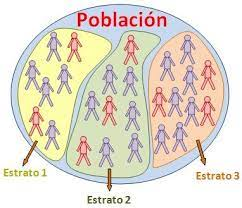

Quiero crear 3 estratos para que en mi muestra estén los equipos que juegan mucho y poco.

In [204]:
# Partidos jugados por cada Pais

#df7 = df1.drop_duplicates(subset=['home_team', 'away_team']).count()
#df7.head()

Creo los estratos separando por la cantidad de partidos jugados

In [205]:

#dfPaises = pd.unique(df1[['home_team', 'away_team']].values.ravel('K'))
#dfPaises

In [206]:
#partidosJugados = df1.groupby(['home_team']).count()
#partidosJugados[104:107]

In [207]:
# Cantidad de partidos jugados por cada Pais
partidosJugados = df1.groupby(['home_team']).count() + df1.groupby(['away_team'	]).count()
partidosJugados= partidosJugados['date'][104:107]
partidosJugados

German DR    298.0
Germany      946.0
Ghana        598.0
Name: date, dtype: float64

In [208]:
# Cantidad de partidos ganados en casa

partidosJugados = df1[(df1['home_score'] > df1['away_score'])].groupby(['home_team']).count() 
partidosJugados= partidosJugados[['date']][95:102]
#partidosJugados 

In [209]:
partidosJugados=pd.DataFrame(partidosJugados)
partidosJugados = partidosJugados.sort_values('date')
partidosJugados.reset_index()
partidosJugados.rename(columns={ 'home_team': 'Pais2', 'date': 'Pais'})
type(partidosJugados)
partidosJugados.columns

Index(['date'], dtype='object')

In [210]:
partidosJugados.sort_values('date')
partidosJugados

,date
home_team,
Galicia,3
Gambia,39
Georgia,47
German DR,77
Gabon,83
Ghana,174
Germany,315


Creo los percentiles de los partidos jugados.
Quiero ver el impacto en el muestreo si lo estratifico en 3 categorias en funcion de la cantidad de partidos jugados... 
A mas partidos jugados.... más profesional eres

In [211]:
print(partidosJugados.date.quantile([.25, .5, .75]))
qs=partidosJugados.date.quantile([.25, .5, .75]).values

#Distribuyo los valores por Cuartiles:
partidosJugados['Cuartil']= pd.qcut(partidosJugados['date'],  
                             q = 4, labels = False)
partidosJugados

0.25     43.0
0.50     77.0
0.75    128.5
Name: date, dtype: float64


,date,Cuartil
home_team,,
Galicia,3,0
Gambia,39,0
Georgia,47,1
German DR,77,1
Gabon,83,2
Ghana,174,3
Germany,315,3


In [212]:
!pip install sidetable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
# Obtener la frecuencia de ocurrencia con Sidetable

import sidetable as stb
df1.stb.freq(['home_team'])

,home_team,count,percent,cumulative_count,cumulative_percent
0,Brazil,567,1.374779,567,1.374779
1,Argentina,547,1.326286,1114,2.701064
2,Mexico,512,1.241423,1626,3.942487
3,Germany,503,1.219601,2129,5.162088
4,England,491,1.190505,2620,6.352593
...,...,...,...,...,...
305,Madrid,1,0.002425,41239,99.990301
306,Kabylia,1,0.002425,41240,99.992726
307,Crimea,1,0.002425,41241,99.995151
308,Chameria,1,0.002425,41242,99.997575


In [214]:
 #Busco los partidos que ha ganado localmente

df1['homeGanador'] = np.where(df1['home_score']>df1['away_score'], 1, 0)

partidosJugados = df1[(df1['homeGanador'] == 'pierde_Empata')].groupby(['home_team']).count() 
partidosJugados= partidosJugados[['date']][95:102]
partidosJugados= partidosJugados.sort_values(by = ['date'])
#partidosJugados 

In [215]:
#df3=df1.groupby('home_team', as_index=False).agg({'homeGanador': "sum", 'home_score':'count'})

In [216]:
# Creo 3 grupos en funcion de la cantidad de partidos jugados.

df3=df1.groupby('home_team', as_index=False).agg({'homeGanador': "sum", 'home_score':'count'})

df3['%']=round(df3['homeGanador']/df3['home_score']*100,1)

df3= df3.set_axis(['Pais', 'PartidosGanadosCasa', 'PartidosJugados', '%_ganados'], axis=1)
df3.rename({'home_team': 'Pais', 'home_score': 'partidosJugados'}, axis = 1)
df3['Cuartil']= pd.qcut(df3['PartidosJugados'],  
                             q = 3, labels = False)
df3 =df3.sort_values('PartidosJugados')
df3['perdidos']= df3['PartidosJugados']- df3['PartidosGanadosCasa']
df3[50:-20]

,Pais,PartidosGanadosCasa,PartidosJugados,%_ganados,Cuartil,perdidos
254,South Ossetia,1,7,14.3,0,6
143,Kernow,3,8,37.5,0,5
63,Corsica,3,8,37.5,0,5
84,Ellan Vannin,5,8,62.5,0,3
286,United Koreans in Japan,2,8,25.0,0,6
...,...,...,...,...,...,...
256,Spain,243,357,68.1,2,114
237,Saudi Arabia,201,359,56.0,2,158
142,Kenya,187,367,51.0,2,180
137,Japan,189,368,51.4,2,179


***La estratificacion la he hecho por la cantidad de partidos jugados.***

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


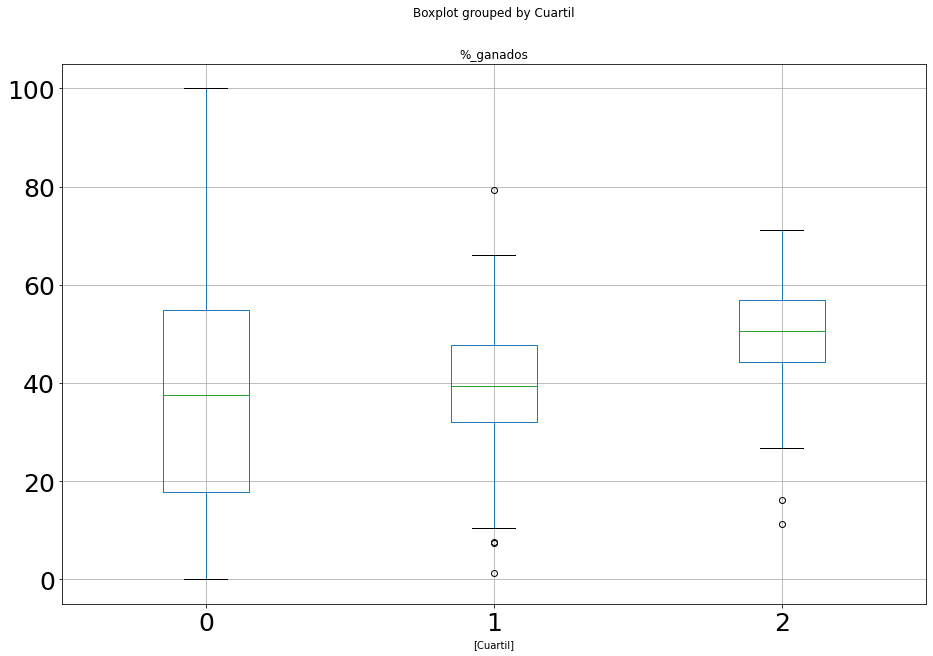

In [217]:
df3.boxplot(column=['%_ganados'], by=['Cuartil'], figsize=(15,10), fontsize=25)
 

Se ve claramente que a más partidos jugados (Eres del grupo 2), tienes más experiencia, eres mas estable porque el IQR es más pequeño que los otros cuartiles, y como juegas más es porque al ganar partidos avanzas más en el campeonato y logiamente debes ganar más partidos en casa tambien.

In [218]:
df4=df3.groupby('Cuartil', as_index=False).agg({'PartidosGanadosCasa': "sum", 'PartidosJugados':'sum'})
df4['%']=round(df4['PartidosGanadosCasa']/df4['PartidosJugados']*100,1)
df4['perdidos']= df4['PartidosJugados']- df4['PartidosGanadosCasa']
df4

,Cuartil,PartidosGanadosCasa,PartidosJugados,%,perdidos
0,0,421,1058,39.8,637
1,1,3954,9560,41.4,5606
2,2,15678,30625,51.2,14947


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f241d407810>],
      dtype=object)

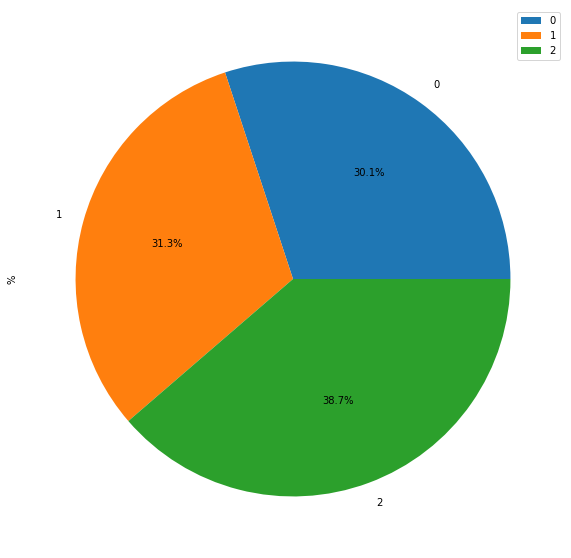

In [219]:
df4.plot.pie(y = '%', figsize=(15,10), autopct='%1.1f%%', subplots=True)

In [220]:
# Muestreo:

muestraQ0= df3[df3['Cuartil']==0].sample(60)
muestraQ0Porcentaje =muestraQ0['PartidosGanadosCasa'].sum()/muestraQ0['PartidosJugados'].sum()
print('\n\nEl % de partidos ganados en casa en el grupo 0 de modo aleatorio estratificado es de: ',round(muestraQ0Porcentaje*100,2), '%')



El % de partidos ganados en casa en el grupo 0 de modo aleatorio estratificado es de:  34.99 %


In [221]:
muestraQ3= df3[df3['Cuartil']==2].sample(60)
muestraQ3Porcentaje =muestraQ3['PartidosGanadosCasa'].sum()/muestraQ3['PartidosJugados'].sum()
print('El % de partidos ganados en casa en el grupo 2 de modo aleatorio es de: ',round(muestraQ3Porcentaje*100,3), '%')

muestraQ1= df3[df3['Cuartil']==1].sample(60)
muestraQ1Porcentaje =muestraQ1['PartidosGanadosCasa'].sum()/muestraQ1['PartidosJugados'].sum()
print('El % de partidos ganados en casa en el grupo 1 de modo aleatorio es de: ',round(muestraQ1Porcentaje*100,3), '%')

El % de partidos ganados en casa en el grupo 2 de modo aleatorio es de:  52.634 %
El % de partidos ganados en casa en el grupo 1 de modo aleatorio es de:  39.989 %


Comparar con toda la muestra:

In [222]:
df4

,Cuartil,PartidosGanadosCasa,PartidosJugados,%,perdidos
0,0,421,1058,39.8,637
1,1,3954,9560,41.4,5606
2,2,15678,30625,51.2,14947


**Conclusión:**

Aplicando la estratificación la diferencia es de un   % de error minimo.

ver tabala estratificado v poblacion total

grupo 0 --> 39.97% v 39.8%

grupo 1 --> 39.6% v 41.4%

grupo 2 --> 50.68% v 51.2%

Y es el modo de que todos los estratos participen en la muestra y no se descompensen sus proporciones.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


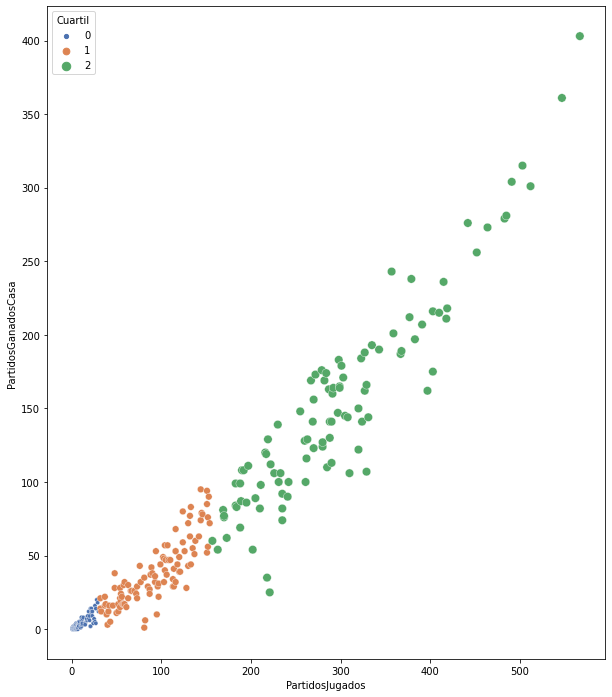

In [223]:
import seaborn as sns 
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10,12))


sns.axes_style( )  
sns.scatterplot( 'PartidosJugados','PartidosGanadosCasa', data= df3, hue='Cuartil', palette="deep", size='Cuartil')
#sns.title('Relacion partidos Jugados v Ganados')  
#plt.show()


# ¿Qué es SMOTE?
SMOTE es un algoritmo de sobremuestreo que se basa en el concepto de vecinos más cercanos para crear sus datos sintéticos. Propuesto de nuevo en 2002 por Chawla et. Alabama ., SMOTE se ha convertido en uno de los algoritmos más populares para el sobremuestreo.

Los datos sintéticos son datos artificiales generados de forma inteligente que se asemejan a la forma o los valores de los datos que se pretende mejorar. En lugar de simplemente hacer nuevos ejemplos proceso de copiar los datos que ya tenemos (como se explica en el último párrafo), un generador de datos sintéticos crea datos que son similares al existente. La creación de datos sintéticos es donde SMOTE brilla.

el punto azul rodeado con un círculo es la observación actual, el punto azul no rodeado es su vecino más cercano y el punto verde es el sintético.

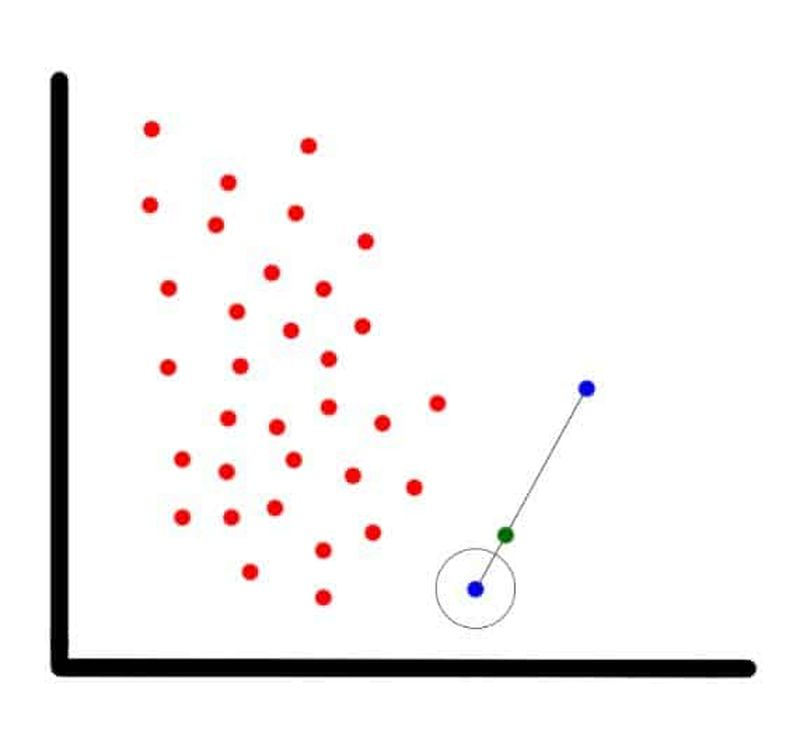

In [224]:
'''
spain2= spain.copy()
spain2['equipoContrario'] = np.where(spain2['away_team'] == 'Spain', spain2['home_team'], spain2['away_team'])
spain2['winSpain'] = np.where(((spain2['home_team'] == 'Spain') & (spain2['home_score'] >spain2['away_score'])) |
                              ((spain2['away_team'] == 'Spain') & (spain2['home_score'] <spain2['away_score']))    ,1, 0)
#spain2
'''

"\nspain2= spain.copy()\nspain2['equipoContrario'] = np.where(spain2['away_team'] == 'Spain', spain2['home_team'], spain2['away_team'])\nspain2['winSpain'] = np.where(((spain2['home_team'] == 'Spain') & (spain2['home_score'] >spain2['away_score'])) |\n                              ((spain2['away_team'] == 'Spain') & (spain2['home_score'] <spain2['away_score']))    ,1, 0)\n#spain2\n"

In [225]:
'''
# Verifico como actua con los partidos que en teoria ha perdido Spain para comprobar que la fórmula esta ok.
# Verifico manualmente ....  y está bien.

pierde = spain2.loc[:,'winSpain'] ==0
pierde2 = spain2.loc[pierde]
pierde2.head()
'''

"\n# Verifico como actua con los partidos que en teoria ha perdido Spain para comprobar que la fórmula esta ok.\n# Verifico manualmente ....  y está bien.\n\npierde = spain2.loc[:,'winSpain'] ==0\npierde2 = spain2.loc[pierde]\npierde2.head()\n"

In [226]:
'''
partidosGanados= spain2.groupby(['equipoContrario']).sum()
partidosJugados = spain2.groupby(['equipoContrario']).count()
partidosGanados.drop(['home_score', 'away_score', 'year', 'neutral'], axis = 'columns', inplace = True)
#partidosGanados
'''

"\npartidosGanados= spain2.groupby(['equipoContrario']).sum()\npartidosJugados = spain2.groupby(['equipoContrario']).count()\npartidosGanados.drop(['home_score', 'away_score', 'year', 'neutral'], axis = 'columns', inplace = True)\n#partidosGanados\n"

In [227]:
#partidosJugados

In [228]:
'''
resumen = pd.concat([partidosGanados, partidosJugados], axis = 1,)
resumen = resumen.sort_values('jugados')[-10:]
resumen['proporcion'] = (resumen['winSpain']/resumen['jugados'])
resumen = resumen.sort_values('proporcion')
resumen['proporcion'] = resumen['proporcion'].apply(lambda x: format(x, '.2%'))
resumen
'''

"\nresumen = pd.concat([partidosGanados, partidosJugados], axis = 1,)\nresumen = resumen.sort_values('jugados')[-10:]\nresumen['proporcion'] = (resumen['winSpain']/resumen['jugados'])\nresumen = resumen.sort_values('proporcion')\nresumen['proporcion'] = resumen['proporcion'].apply(lambda x: format(x, '.2%'))\nresumen\n"

# SMOTEN
https://imbalanced-learn.org/stable/over_sampling.html

In [229]:
# Saco las variables de X
resumen = df1.reset_index(drop= False)
X= resumen.iloc[:,[2,4, 5]]
X

,home_team,home_score,away_score
0,Scotland,0,0
1,England,4,2
2,Scotland,2,1
3,England,2,2
4,Scotland,3,0
...,...,...,...
41238,Lesotho,0,0
41239,Guinea,1,0
41240,Mali,2,0
41241,Burkina Faso,0,0


In [230]:
y= resumen.iloc[:,[12]]
y
#df1

,homeGanador
0,0
1,1
2,1
3,0
4,1
...,...
41238,0
41239,1
41240,1
41241,0


In [231]:
resumen

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year,homeGanador
0,0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30,1872,0
1,1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08,1873,1
2,2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07,1874,1
3,3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06,1875,0
4,4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04,1876,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41238,41238,2019-10-20,Lesotho,Zimbabwe,0,0,African Nations Championship qualifying,Lesotho,Lesotho,False,2019-10-20,2019,0
41239,41239,2019-10-20,Guinea,Senegal,1,0,African Nations Championship qualifying,Conakry,Guinea,False,2019-10-20,2019,1
41240,41240,2019-10-20,Mali,Mauritania,2,0,African Nations Championship qualifying,Mali,Mali,False,2019-10-20,2019,1
41241,41241,2019-10-20,Burkina Faso,Ghana,0,0,African Nations Championship qualifying,Burkina Faso,Burkina Faso,False,2019-10-20,2019,0


In [232]:

from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0], random_state=0)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)
print(y_resampled.shape)

(42380, 1)


In [233]:
X_resampled.head()


,home_team,home_score,away_score
0,Scotland,0,0
1,England,4,2
2,Scotland,2,1
3,England,2,2
4,Scotland,3,0


# Nivell 3

## Exercici 3
Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling. Nueva sección

In [234]:
import random

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = generator(len(df1))
k=400
reservoir = []

for i, elemento in enumerate(stream):
    if i+1<= k:
        reservoir.append(elemento)
    else:
        probabilidad = k/(i+1)
        if random.random() < probabilidad:
             reservoir[random.choice(range(0,k))] = elemento

In [235]:


reservoir_sample = resumen.iloc[reservoir]
reservoir_sample.head()

,index,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,fecha,year,homeGanador
4696,4696,1960-05-22,Hungary,England,2,0,Friendly,Budapest,Hungary,False,1960-05-22,1960,1
30395,30395,2008-06-22,Curaçao,Haiti,0,1,FIFA World Cup qualification,Willemstad,Netherlands Antilles,True,2008-06-22,2008,0
8073,8073,1972-02-27,Congo,DR Congo,0,2,African Cup of Nations,Douala,Cameroon,True,1972-02-27,1972,0
1841,1841,1936-01-12,France,Netherlands,1,6,Friendly,Paris,France,False,1936-01-12,1936,0
40884,40884,2019-07-08,Tuvalu,Solomon Islands,0,13,Pacific Games,Apia,Samoa,True,2019-07-08,2019,0


In [236]:
reservoir_sample.shape

(400, 13)

**Conlclusión**
Con el muestreo reservoir todos los registros han tenido una probabilidad **uniforme** de salir